In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:/Users/Gaurav Gaur/cott_disease_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:/Users/Gaurav Gaur/cott_disease_data\test\Aphids\11.jpg
C:/Users/Gaurav Gaur/cott_disease_data\test\Aphids\15.jpg
C:/Users/Gaurav Gaur/cott_disease_data\test\Aphids\19.jpg
C:/Users/Gaurav Gaur/cott_disease_data\test\Aphids\2.jpg
C:/Users/Gaurav Gaur/cott_disease_data\test\Aphids\31.jpg
C:/Users/Gaurav Gaur/cott_disease_data\test\Aphids\36.jpg
C:/Users/Gaurav Gaur/cott_disease_data\test\Aphids\37.jpg
C:/Users/Gaurav Gaur/cott_disease_data\test\Aphids\9.jpg
C:/Users/Gaurav Gaur/cott_disease_data\test\Aphids\constract_high_23.jpg
C:/Users/Gaurav Gaur/cott_disease_data\test\Aphids\constract_high_28.jpg
C:/Users/Gaurav Gaur/cott_disease_data\test\Aphids\constract_high_30.jpg
C:/Users/Gaurav Gaur/cott_disease_data\test\Aphids\constract_high_37.jpg
C:/Users/Gaurav Gaur/cott_disease_data\test\Aphids\constract_high_39.jpg
C:/Users/Gaurav Gaur/cott_disease_data\test\Aphids\constract_high_4.jpg
C:/Users/Gaurav Gaur/cott_disease_data\test\Aphids\constract_high_6.jpg
C:/Users/Gaurav Gaur/cott_dis

In [2]:

import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Input
import matplotlib.pyplot as plt

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory = "C:/Users/Gaurav Gaur/cott_disease_data/train",
    batch_size = 32,
    image_size = (256, 256),
    shuffle = True
)

class_names = dataset.class_names
class_names

Found 8640 files belonging to 6 classes.


['Aphids',
 'Army_worm',
 'Bacterial_Blight',
 'Healthy',
 'Powdery_Mildew',
 'Target_spot']

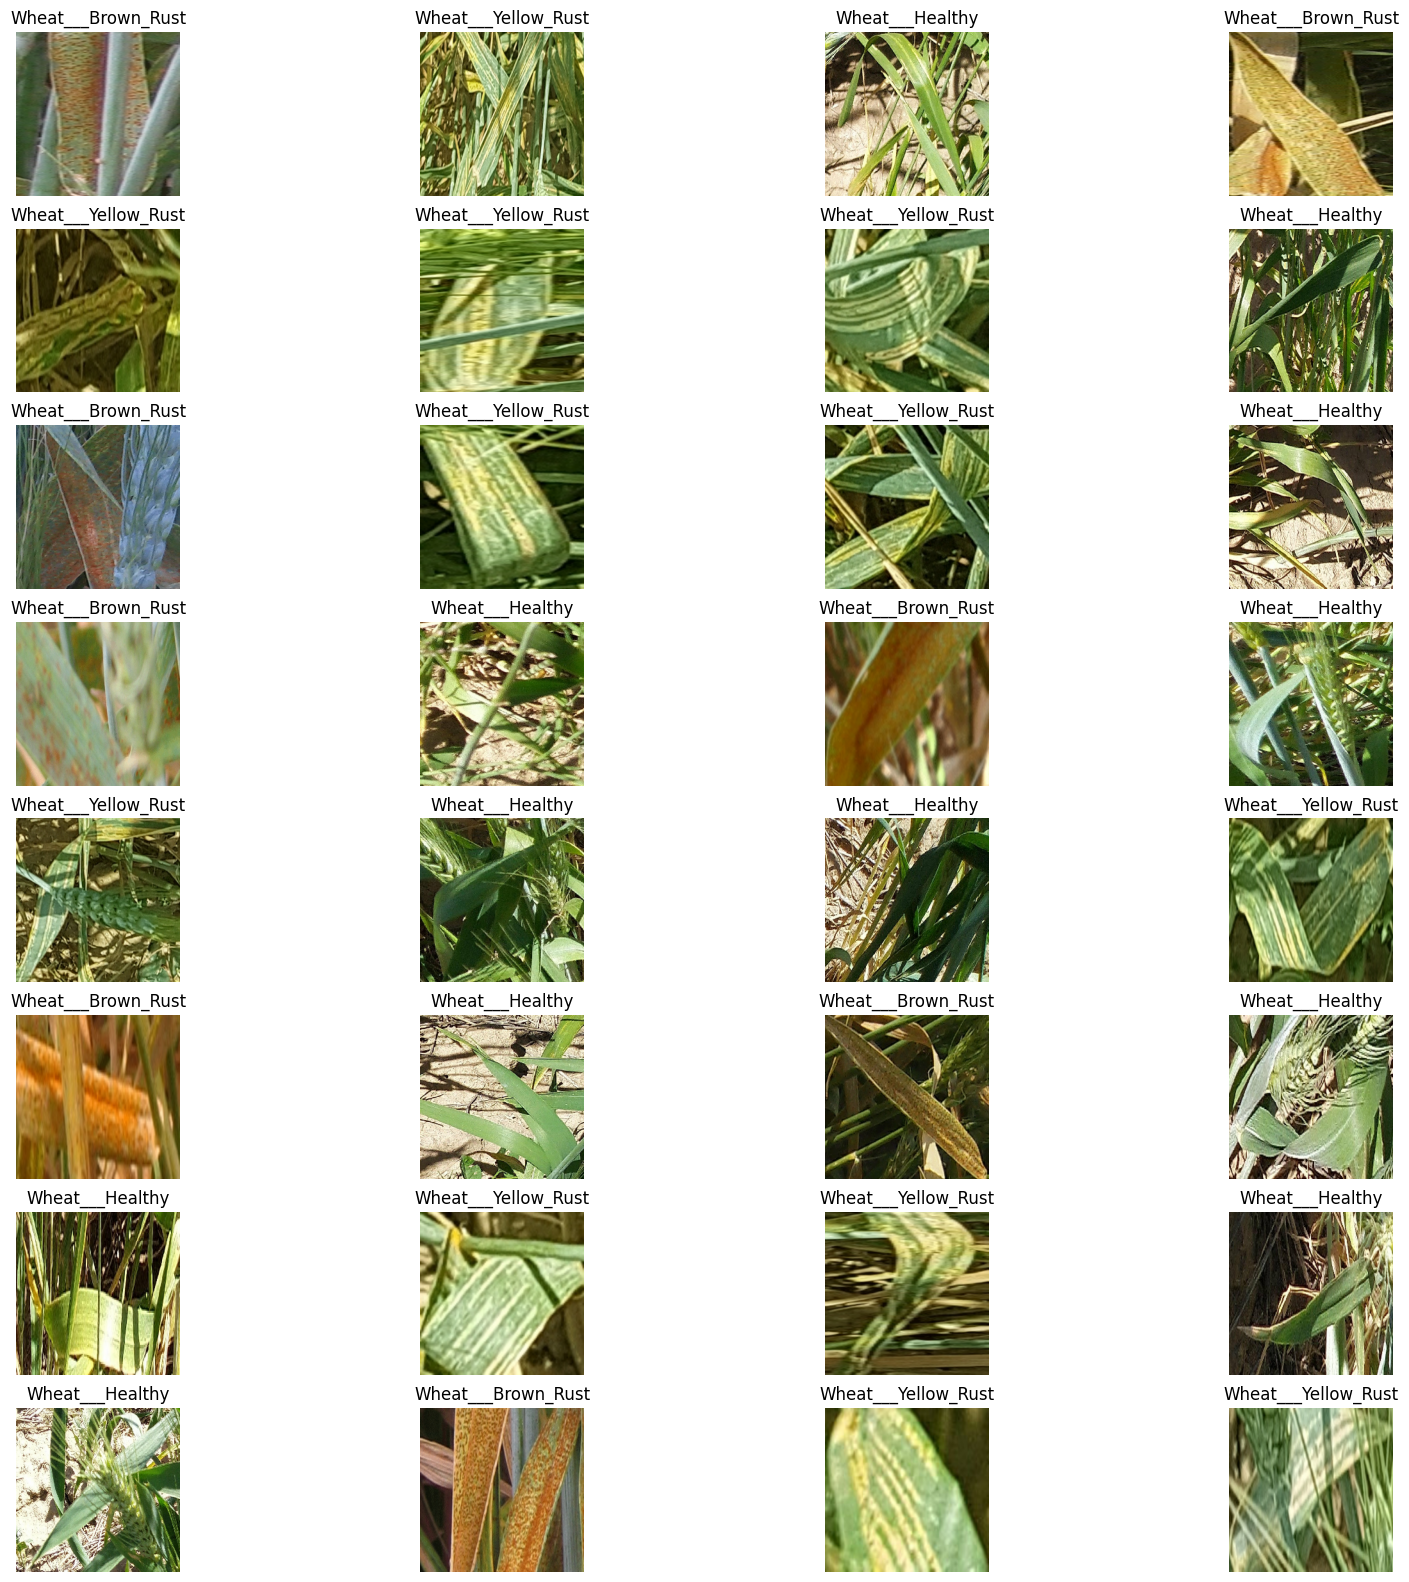

In [61]:
plt.figure(figsize=(20,20))
for image_batch, label_batch in dataset.take(1): 
    for i in range(32):
        plt.subplot(8,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[label_batch[i]])

In [7]:
#creating function for train test split
def get_dataset_partition_tf(ds, train_split= 0.8, val_split= 0.2,shuffle = True, shuffle_size= 10000):
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 7)
    
    ds_size = len(ds)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds

In [8]:
train_ds, val_ds = get_dataset_partition_tf(dataset)
print(len(train_ds))
print(len(val_ds))



216
54


In [9]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [11]:
rescale_resize = tf.keras.Sequential([
    layers.Resizing(256, 256),
    layers.Rescaling(1.0/255)
])

data_aug = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [19]:
model = models.Sequential([
    #rescale_resize,
    #data_aug,
    Input(shape=(256,256,3)),
    layers.Conv2D(32, (3,3), activation = "relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation = "relu"),
    layers.Dense(3, activation = "softmax"),
])


In [20]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 277,891 (1.06 MB)

 Trainable params: 277,891 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(
    optimizer= 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [28]:
history = model.fit(train_ds,
                    epochs=20,
                    validation_data=val_ds,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]
                    )


KeyboardInterrupt: 

In [91]:
scores = model.evaluate(test_ds)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 0.0043


In [81]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

first image to predict
actual label: Wheat___Brown_Rust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
predicted label: Wheat___Brown_Rust


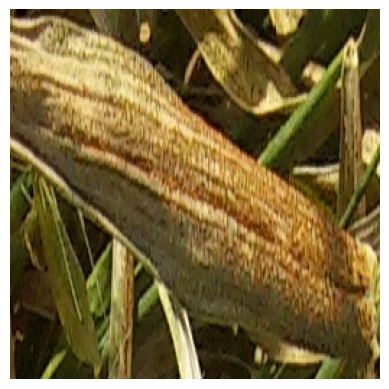

In [82]:
for images_batch, labels_batch in test_ds.take(1):
    img = images_batch[0].numpy().astype('uint8')
    label = labels_batch[0]
    plt.axis('off')
    print("first image to predict")
    plt.imshow(img)
    print("actual label:", class_names[label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [93]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array ,0)
    
    predictions = model.predict(img_array)
    pred_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*np.max(predictions[0]),2)
    return pred_class,confidence
    


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


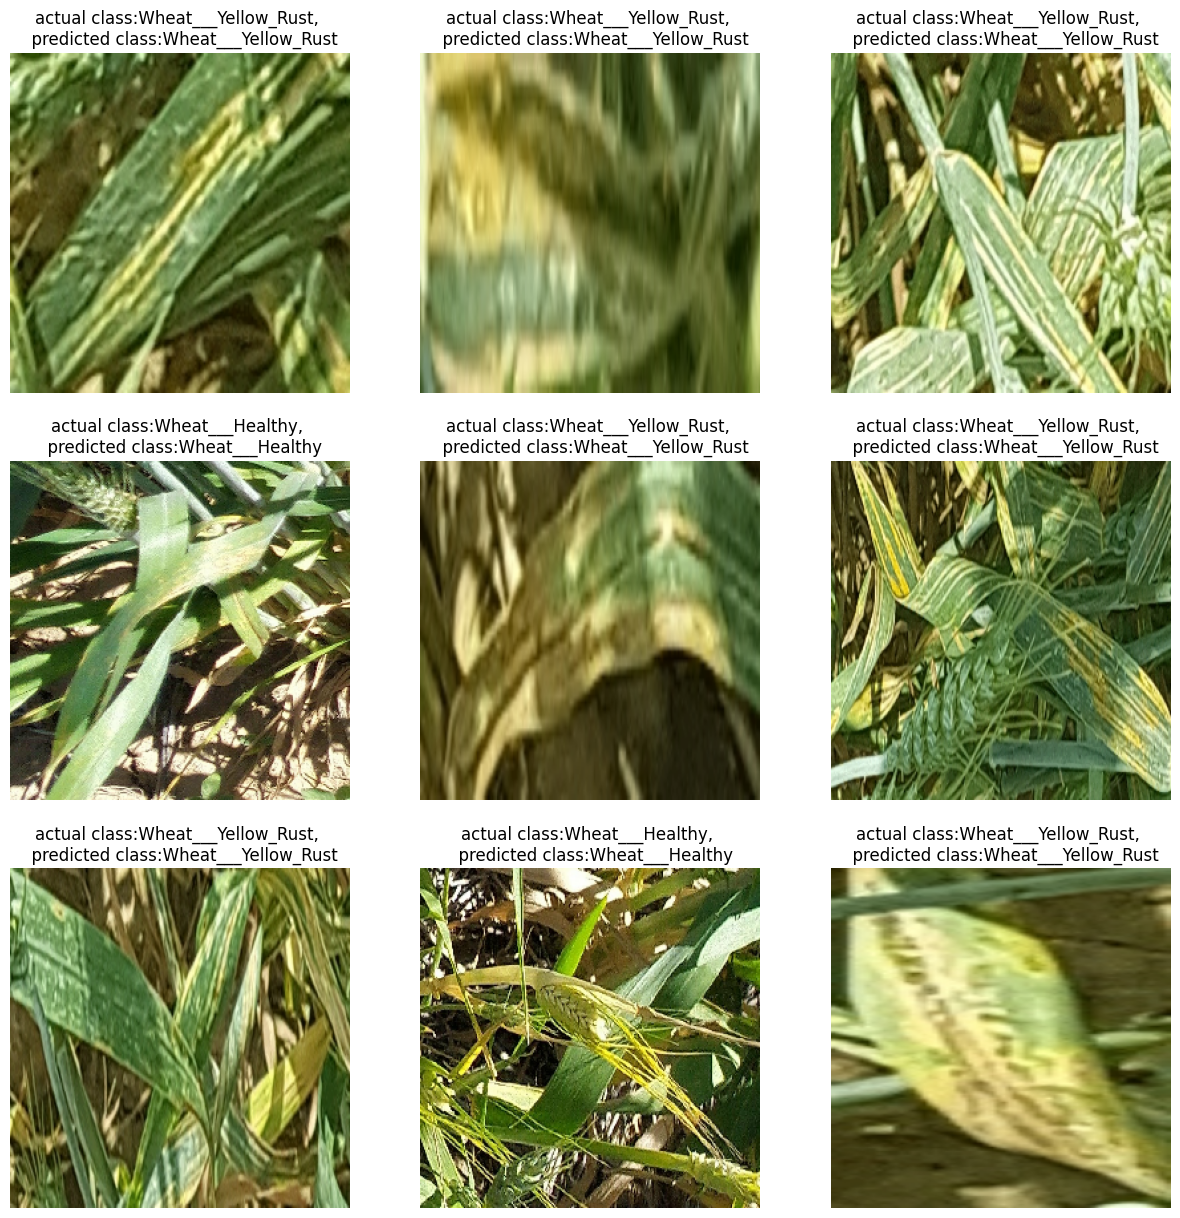

In [85]:
plt.figure(figsize = (15, 15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.axis("off")
        pred_class, conf = predict(model, images[i].numpy())
        
        plt.title(f"actual class:{class_names[labels[i]]}, \n  predicted class:{pred_class}")
        

In [98]:
model.save('/kaggle/working/model_wheat.h5')